In [2]:
import pandas as pd
from prettytable import PrettyTable

In [3]:
data_suicidio = pd.read_csv('/home/hadoop/dataset/suicidio_1985_2016.csv');

<h2>Carregamento de Dados</h2

In [4]:
# data_brazil = data_suicidio.loc[data_suicidio['country'] == 'Brazil'] # opção 1
data_brazil = data_suicidio[data_suicidio.country.isin(['Brazil'])] # Filtra só no Brazil

data_brazil_sex = data_brazil[data_brazil.sex.isin(['male'])]
data_brazil_age = data_brazil_sex[data_brazil_sex.age.isin(['15-24 years'])]

data_brazil_sex_female = data_brazil[data_brazil.sex.isin(['female'])]
data_brazil_age_female = data_brazil_sex_female[data_brazil_sex_female.age.isin(['15-24 years'])]

In [5]:
data_brazil.count() # Mostra quantidade de registros por coluna

country               372
year                  372
sex                   372
age                   372
suicides_no           372
population            372
suicides/100k pop     372
country-year          372
HDI for year          120
 gdp_for_year ($)     372
gdp_per_capita ($)    372
generation            372
dtype: int64

In [6]:
pd.DataFrame({'tipos':data_brazil.dtypes, 'missing':data_brazil.isna().sum()}) # verifica valores nulos por coluna

,tipos,missing
country,object,0
year,int64,0
sex,object,0
age,object,0
suicides_no,int64,0
population,int64,0
suicides/100k pop,float64,0
country-year,object,0
HDI for year,float64,252
gdp_for_year ($),object,0


In [7]:
# criei dataframe com as duas informações que vou trabalhar
dataset_work_male = data_brazil_age[['year','suicides_no']] 
dataset_work_female = data_brazil_age_female[['year','suicides_no']] 

In [8]:
print('Tamanho dataset masculino: ',dataset_work_male.size) # tamanho do dataset
print('Tamanho dataset feminino: ',dataset_work_female.size)

Tamanho dataset masculino:  62
Tamanho dataset feminino:  62


In [9]:
# Criando os Index das colunas
dataset_work_male.set_index('year')
dataset_work_female.set_index('year')

,suicides_no
year,
1985,280
1986,331
1987,291
1988,281
1989,261
1990,304
1991,303
1992,283
1993,334


In [10]:
#dataset_work_male.sort_values(by=['suicides_no'], ascending=False) # Descrecente
#dataset_work_male.sort_values(by=['year'], ascending=False) # Descrecente

table_suicidio = pd.merge(dataset_work_male, dataset_work_female, on='year')
table_suicidio

,year,suicides_no_x,suicides_no_y
0,1985,661,280
1,1986,685,331
2,1987,713,291
3,1988,663,281
4,1989,722,261
5,1990,731,304
6,1991,771,303
7,1992,816,283
8,1993,917,334
9,1994,988,372


<h3> 1 - Medidas de Tendência Central (Média, Mediana e Moda)</h3>

In [11]:
print('Média (masculino): ',dataset_work_male['suicides_no'].mean())
print('Mediana (masculino): ',dataset_work_male['suicides_no'].median())
# print('Moda (masculino): ',dataset_work_male['suicides_no'].mode())
print('Moda (masculino): AMODAL')
print('========================================')
print('Média (feminino): ',dataset_work_female['suicides_no'].mean())
print('Mediana (feminino): ',dataset_work_female['suicides_no'].median())
print('Moda (feminino): ',dataset_work_female['suicides_no'].mode())
# print('Moda (feminino): AMODAL')

Média (masculino):  1087.741935483871
Mediana (masculino):  1164.0
Moda (masculino): AMODAL
Média (feminino):  350.8709677419355
Mediana (feminino):  362.0
Moda (feminino):  0    281
1    347
2    413
dtype: int64


<h3>1.1 - Escore Z</h3>

In [12]:
def situacao_escore_media(valor_escore):
    if valor_escore > 0:
        return ('Acima da Média')
    elif valor_escore < 0:
        return ('Abaixo da Média')
    elif valor_escore == 0:
        return ('Igual a Média')

<h4>Masculino</h4>

In [13]:
#df_zscore = (dataset_work['suicides_no'] - dataset_work['suicides_no'].mean())/dataset_work['suicides_no'].std()
# now iterate over the remaining columns and create a new zscore column
print('YEAR\tSUICIDES_NO\tESCORE Z')
for index, row in dataset_work_male.iterrows():
    #print(row['year'], row['suicides_no'])    
    escore_z = (row['suicides_no'] - dataset_work_male['suicides_no'].mean())/dataset_work_male['suicides_no'].std()
    print(row['year'],'\t',row['suicides_no'],'\t',escore_z,'\t',situacao_escore_media(escore_z))

YEAR	SUICIDES_NO	ESCORE Z
1985 	 661 	 -1.7203858916472643 	 Abaixo da Média
1986 	 685 	 -1.6236312538526037 	 Abaixo da Média
1987 	 713 	 -1.5107508430921663 	 Abaixo da Média
1988 	 663 	 -1.7123230051643759 	 Abaixo da Média
1989 	 722 	 -1.4744678539191687 	 Abaixo da Média
1990 	 731 	 -1.438184864746171 	 Abaixo da Média
1991 	 771 	 -1.2769271350884033 	 Abaixo da Média
1992 	 816 	 -1.0955121892234148 	 Abaixo da Média
1993 	 917 	 -0.6883364218375516 	 Abaixo da Média
1994 	 988 	 -0.40210395169501406 	 Abaixo da Média
1995 	 1084 	 -0.015085400516371838 	 Abaixo da Média
1996 	 1164 	 0.30743005879916335 	 Acima da Média
1997 	 1102 	 0.05748057782962358 	 Acima da Média
1998 	 1089 	 0.005071815690849113 	 Acima da Média
1999 	 1103 	 0.06151202107106778 	 Acima da Média
2000 	 1037 	 -0.20456323286424877 	 Abaixo da Média
2001 	 1262 	 0.702511496460694 	 Acima da Média
2002 	 1226 	 0.5573795397687031 	 Acima da Média
2003 	 1259 	 0.6904171667363614 	 Acima da Média
200

<h4>Feminino</h4>

In [14]:
print('YEAR\tSUICIDES_NO\tESCORE Z')
for index, row in dataset_work_female.iterrows():
    #print(row['year'], row['suicides_no'])    
    escore_z = (row['suicides_no'] - dataset_work_female['suicides_no'].mean())/dataset_work_female['suicides_no'].std()
    print(row['year'],'\t',row['suicides_no'],'\t',escore_z,'\t',situacao_escore_media(escore_z))

YEAR	SUICIDES_NO	ESCORE Z
1985 	 280 	 -1.5273125224327315 	 Abaixo da Média
1986 	 331 	 -0.4282314582697145 	 Abaixo da Média
1987 	 291 	 -1.2902558223191396 	 Abaixo da Média
1988 	 281 	 -1.505761913331496 	 Abaixo da Média
1989 	 261 	 -1.9367740953562083 	 Abaixo da Média
1990 	 304 	 -1.0100979040030764 	 Abaixo da Média
1991 	 303 	 -1.031648513104312 	 Abaixo da Média
1992 	 283 	 -1.4626606951290246 	 Abaixo da Média
1993 	 334 	 -0.3635796309660076 	 Abaixo da Média
1994 	 372 	 0.4553435148809462 	 Acima da Média
1995 	 347 	 -0.08342171264994444 	 Abaixo da Média
1996 	 347 	 -0.08342171264994444 	 Abaixo da Média
1997 	 327 	 -0.5144338946746569 	 Abaixo da Média
1998 	 364 	 0.28293864207106123 	 Acima da Média
1999 	 281 	 -1.505761913331496 	 Abaixo da Média
2000 	 345 	 -0.1265229308524157 	 Abaixo da Média
2001 	 393 	 0.9079063060068944 	 Acima da Média
2002 	 411 	 1.2958172698291357 	 Acima da Média
2003 	 413 	 1.338918488031607 	 Acima da Média
2004 	 403 	 1.1

<h3>1.2 - Simetria do conjunto de dados</h3>

In [15]:
def status_simetria(dataframe):
    skewness = dataframe.skew() # mede o grau de simetria da curva que deve é bem próxima de zero
    if skewness['suicides_no'] > 0:
        return 'Valor do Grau de Simetria:',skewness['suicides_no'],' * Assimétrico Direita - {moda < mediana < média} * Logo, a MEDIA está à direita da MEDIANA'
    elif skewness['suicides_no'] < 0:
        return "Valor do Grau de Simetria: ",skewness['suicides_no']," * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA"
    elif skewness['suicides_no'] == 0:
        return 'Valor do Grau de Simetria:',skewness['suicides_no'], ' * Distribuição Simétrica - {moda = mediana = média} * Logo, a MEDIA é igual à MEDIANA'

In [16]:
print('Simetria dados - Masculino: ',status_simetria(dataset_work_male))
print('===============================================================')
print('Simetria dados - Feminino: ',status_simetria(dataset_work_female))

Simetria dados - Masculino:  ('Valor do Grau de Simetria: ', -0.6132529420554358, ' * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA')
Simetria dados - Feminino:  ('Valor do Grau de Simetria: ', -0.40202956170129756, ' * Assimétrico Esquerda - {média < mediana < moda} * Logo, a MEDIA está à esquerda da MEDIANA')


<h3>2 - Medidas de Posição Relativa</h3>

<p><strong>Obs.:</strong> o segundo QUARTIL é equivalente a MEDIANA</p>

In [30]:
# from prettytable import PrettyTable   
x = PrettyTable()

x.field_names = ["Gênero", "Menor valor", "1º quartil", "2º quartil", "3º quartil", "Maior valor"]

x.add_row(["MASCULINO", 
           dataset_work_male['suicides_no'].min(), 
           dataset_work_male['suicides_no'].quantile(0.25), 
           dataset_work_male['suicides_no'].quantile(0.5),
           dataset_work_male['suicides_no'].quantile(0.75),
           dataset_work_male['suicides_no'].max()
          ])

x.add_row(["FEMININO", 
           dataset_work_female['suicides_no'].min(), 
           dataset_work_female['suicides_no'].quantile(0.25), 
           dataset_work_female['suicides_no'].quantile(0.5),
           dataset_work_female['suicides_no'].quantile(0.75),
           dataset_work_female['suicides_no'].max()
          ])

'''
x.field_names = ["City name", "Area", "Population", "Annual Rainfall"]
x.add_row(["Adelaide", 1295, 1158259, 600.5])
x.add_row(["Brisbane", 5905, 1857594, 1146.4])
x.add_row(["Darwin", 112, 120900, 1714.7])
x.add_row(["Hobart", 1357, 205556, 619.5])
x.add_row(["Sydney", 2058, 4336374, 1214.8])
x.add_row(["Melbourne", 1566, 3806092, 646.9])
x.add_row(["Perth", 5386, 1554769, 869.4])
'''
print(x)

+-----------+-------------+------------+------------+------------+-------------+
|   Gênero  | Menor valor | 1º quartil | 2º quartil | 3º quartil | Maior valor |
+-----------+-------------+------------+------------+------------+-------------+
| MASCULINO |     661     |   866.5    |   1164.0   |   1281.5   |     1389    |
|  FEMININO |     261     |   315.5    |   362.0    |   390.0    |     413     |
+-----------+-------------+------------+------------+------------+-------------+


In [28]:
# pip install prettytable
# pip install plotly
# pip install cufflinks
# pip install jupyterlab "ipywidgets>=7.5"

In [ ]:
print('<<< ======= MASCULINO ========= >>>')
print('Menor valor: ',dataset_work_male['suicides_no'].min()) 
print('1º quartil: ', dataset_work_male['suicides_no'].quantile(0.25)) # quartil 0 <= x <= 1
print('2º quartil: ',dataset_work_male['suicides_no'].quantile(0.5)) # quartil 0 <= x <= 1
print('3º quartil: ',dataset_work_male['suicides_no'].quantile(0.75)) # quartil 0 <= x <= 1
# print('Maior valor: ',dataset_work_male['suicides_no'].quantile(1)) # quartil 0 <= x <= 1
print('Maior valor: ',dataset_work_male['suicides_no'].max()) # quartil 0 <= x <= 1

print('<<< ======= FEMININO ========= >>>')
print('Menor valor: ',dataset_work_female['suicides_no'].min()) 
print('1º quartil: ', dataset_work_female['suicides_no'].quantile(0.25)) # quartil 0 <= x <= 1
print('2º quartil: ',dataset_work_female['suicides_no'].quantile(0.5)) # quartil 0 <= x <= 1
print('3º quartil: ',dataset_work_female['suicides_no'].quantile(0.75)) # quartil 0 <= x <= 1
# print('Maior valor: ',dataset_work_female['suicides_no'].quantile(1)) # quartil 0 <= x <= 1
print('Maior valor: ',dataset_work_female['suicides_no'].max()) # quartil 0 <= x <= 1

<h3>3 - Variância e Desvio Padrão</h3>

<h4><strong>Obs.: </strong>O desvio padrão representa uma variação no conjunto que pode ser para cima ou abaxio em relação a média</h4>

In [35]:
'''
print('Variância de Dados: ',dataset_work_male['suicides_no'].var()) # variância
print('Desvio Padrão: ',dataset_work_male['suicides_no'].std()) # Desvio padrão
print('Amplitude: ',dataset_work_male['suicides_no'].max()-dataset_work_male['suicides_no'].min())
print('Coeficiente de Variação: ',(dataset_work_male['suicides_no'].std()/dataset_work_male['suicides_no'].mean())*100)
'''
data_dp = PrettyTable()

data_dp.field_names = ["Gênero", "Variância de Dados", "Desvio Padrão", "Amplitude", "Coeficiente de Variação"]
data_dp.add_row(["MASCULINO",
                 dataset_work_male['suicides_no'].var(),
                 dataset_work_male['suicides_no'].std(),
                 dataset_work_male['suicides_no'].max()-dataset_work_male['suicides_no'].min(),
                 (dataset_work_male['suicides_no'].std()/dataset_work_male['suicides_no'].mean())*100
                ])
data_dp.add_row(["FEMININO",
                 dataset_work_female['suicides_no'].var(),
                 dataset_work_female['suicides_no'].std(),
                 dataset_work_female['suicides_no'].max()-dataset_work_female['suicides_no'].min(),
                 (dataset_work_female['suicides_no'].std()/dataset_work_female['suicides_no'].mean())*100
                ])
print(data_dp)

+-----------+--------------------+-------------------+-----------+-------------------------+
|   Gênero  | Variância de Dados |   Desvio Padrão   | Amplitude | Coeficiente de Variação |
+-----------+--------------------+-------------------+-----------+-------------------------+
| MASCULINO | 61528.86451612903  | 248.0501250072836 |    728    |    22.804133675046835   |
|  FEMININO | 2153.1827956989246 | 46.40240075361322 |    152    |    13.224918850436792   |
+-----------+--------------------+-------------------+-----------+-------------------------+


<h3>4 - Gráficos</h3>

<h3>4.1 - BoxPlot</h3>

In [41]:
diq_male = dataset_work_male['suicides_no'].quantile(0.75) - dataset_work_male['suicides_no'].quantile(0.25)
discrepante_min_male = dataset_work_male['suicides_no'].quantile(0.25) - 1.5 * diq_male 
discrepante_max_male = dataset_work_male['suicides_no'].quantile(0.75) + 1.5 * diq_male 

diq_female = dataset_work_female['suicides_no'].quantile(0.75) - dataset_work_female['suicides_no'].quantile(0.25)
discrepante_min_female = dataset_work_female['suicides_no'].quantile(0.25) - 1.5 * diq_female 
discrepante_max_female = dataset_work_female['suicides_no'].quantile(0.75) + 1.5 * diq_female 

In [42]:
data_box = PrettyTable()
data_box.field_names = ["Gênero","Amplitude Inter Quartil", "Discrepante Mínimo", "Discrepante Máximo"]
data_box.add_row(["MASCULINO", diq_male, discrepante_min_male, discrepante_max_male])
data_box.add_row(["FEMININO", diq_female, discrepante_min_female, discrepante_max_female])
print(data_box)

+-----------+-------------------------+--------------------+--------------------+
|   Gênero  | Amplitude Inter Quartil | Discrepante Mínimo | Discrepante Máximo |
+-----------+-------------------------+--------------------+--------------------+
| MASCULINO |          415.0          |       244.0        |       1904.0       |
|  FEMININO |           74.5          |       203.75       |       501.75       |
+-----------+-------------------------+--------------------+--------------------+


In [43]:
# Função reponsável por retornar TRUE caso encontre discrepante
def exibirValoreDiscrepantes(valor, minimo, maximo):    
    if valor >= minimo and valor <= maximo:
        return False
    else: 
        return True

In [45]:
# Se não retornar não tem valores discrepantes
for index, row in dataset_work_female.iterrows():
    if(exibirValoreDiscrepantes(row['suicides_no'], discrepante_min_female, discrepante_max_female)):
        print(row['suicides_no'])

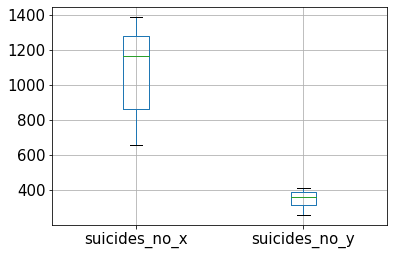

In [46]:
# x = masculino e y = feminino
boxplot = table_suicidio.boxplot(column=['suicides_no_x','suicides_no_y'],fontsize=15)

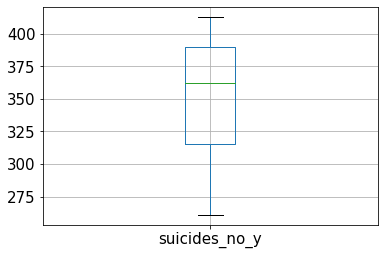

In [47]:
boxplot_male = table_suicidio.boxplot(column=['suicides_no_y'],fontsize=15) # feminino

<h3>4.2 - Bar Plot</h3>

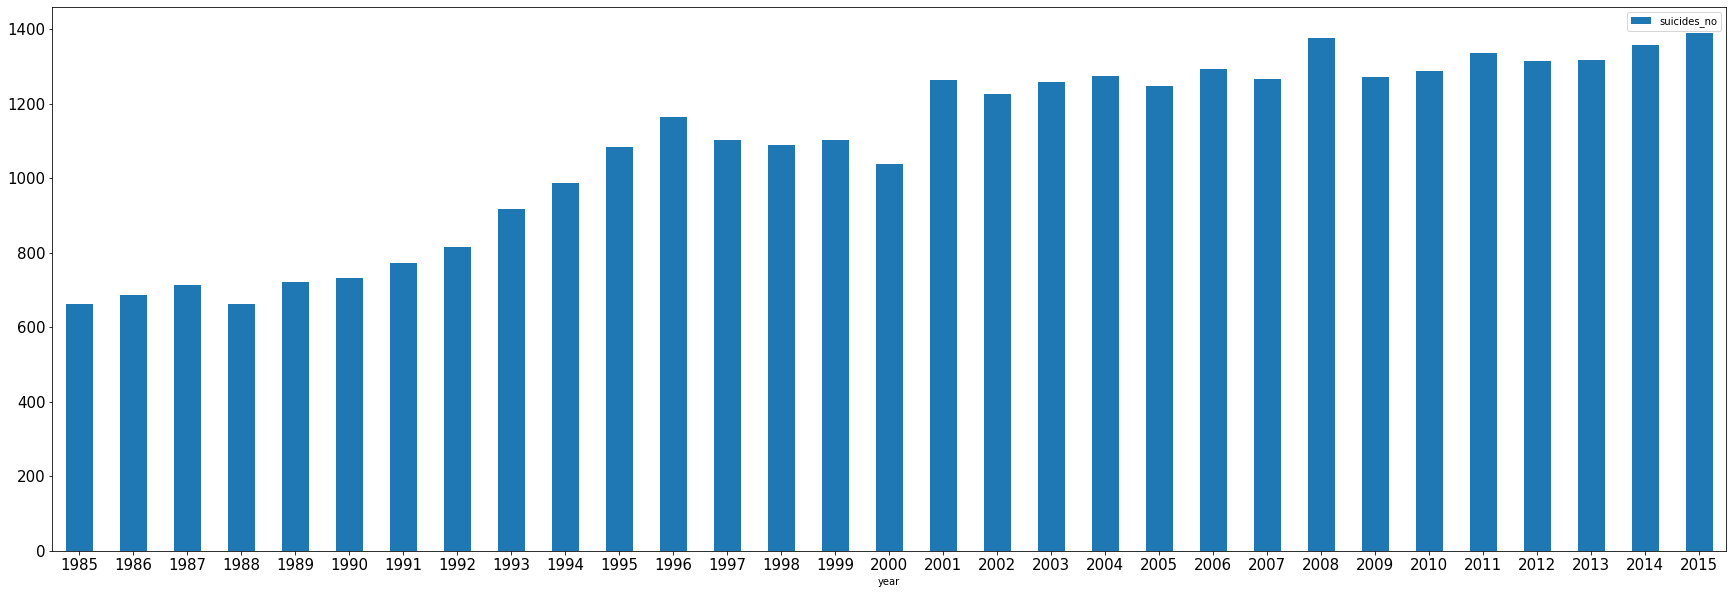

In [149]:
ax = dataset_work.plot.bar(y='suicides_no', x='year', legend='Nº suicídios Brasil',rot=0, fontsize=15, figsize=[30,10])
ax

In [24]:
pip install chart_studio

    100% |████████████████████████████████| 71kB 459kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
https://plotly.com/python/ipython-notebook-tutorial/